# Piskvorky Tournament Data

### TODO (possibly): Might be interesting to study the *.psq games from gomokuworld: See /games

In [1]:
from aegomoku.constants_15x15 import *
stones = [H8, I7, J6, H6, G5, G7, H7, J7, I5, H9, H5, G8, F5, J5]

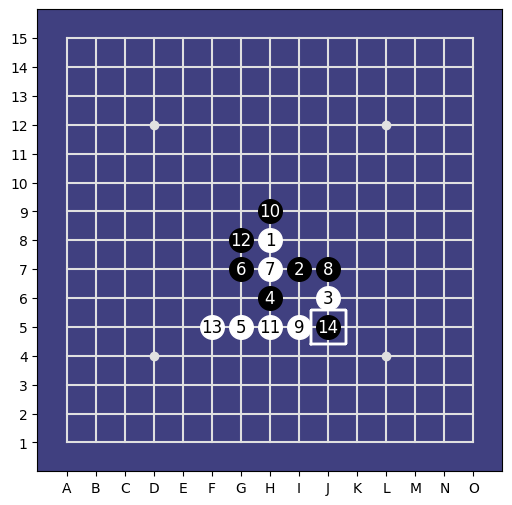

In [3]:
from aegomoku.utils import analyse_board

analyse_board(15, stones, policy=None)

In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from aegomoku.mpl_board import MplBoard


In [35]:
def read_psq(filename):
    file = open(filename, "r")

    blob=file.read()
    lines=blob.split("\n")
    blob = blob.replace(",",";")

    head = lines[0]
    game = lines[1:-5]
    tail = lines[-5:]

    coords = [m.split(',') for m in game]
    stones = [(chr(int(x)+64),int(y)) for x,y,_ in coords]
    game = gt.stones_to_string(stones)

    headers = [w.strip() for w in head.split(",")]

    filetype, dimensions=headers[0].split()

    assert(filetype=="Piskvorky")

    dim_x, dim_y = dimensions.split('x')
    dim_x, dim_y = int(dim_x), int(dim_y)

    h3, h4 = headers[1:]

    player1, player2 = tail[:2]

    t3=tail[2]
    t4, tournament = tail[3].split(",")

    return {
        'filetype': filetype,
        'dim_x': dim_x,
        'dim_y': dim_y,
        'h3': h3,
        'h4': h4,
        'player1': player1,
        'player2': player2,
        'game': game,
        't3': t3,
        't4': t4,
        'tournament': tournament,
        'blob': blob
    }

from [Yixin vs Rudolf Dupszki](https://www.aiexp.info/ai-vs-human-gomoku-2.html), we have a nice threat sequence:

- Round1: Swap2, two more, +, Yixin white. 
- Round2: Swap2, two more, +, Yixin black.

In [4]:
# Round 1
# stones=gt.string_to_stones('l13k12m11n14o13k11j12k13k10j10i9j9j8k7h11l8i11m9n10m7l9l7n7m8m6k6n9n6k9i7j7k5')
# Round 2
stones=gt.string_to_stones('e10g8g5f5f6e7f7f8e8g9h10d9g10f10h8h9i9g7e9j8h11i12e11e12g11f11f12e13g13h14i10g14j9k8i8k4i7')


In [17]:
b = GomokuBoard(heuristics=Heuristics(kappa=3), n=20, stones=stones, disp_width=8)

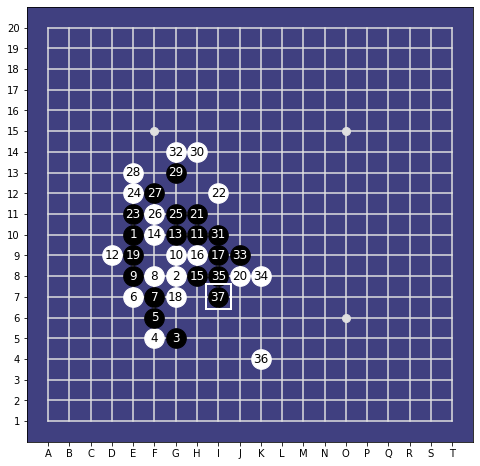

In [18]:
b.display()

# Reading psq files

In [27]:
file = open("../games/0_2_8_2.psq", "r")
lines = [l.strip().split(',') for l in file]
stones = [(chr(64+int(x)), int(y)) for x,y,_ in lines[1:-4]]
print(stones)

In [31]:
b = GomokuBoard(heuristics=Heuristics(kappa=3), stones=stones, disp_width=8, n=20)

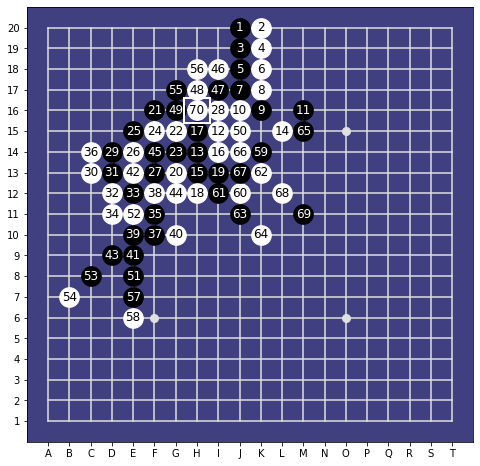

In [32]:
b.display()

In [42]:
the_file = "/Users/wgiersche/data/gomoku/gomocup2019results/Standard/2_1_9_2.psq"

In [43]:
file = open(the_file, "r")
lines = [l.strip().split(',') for l in file]
stones = [(chr(64+int(x)), int(y)) for x,y,_ in lines[1:-4]]
print(stones),
read_psq(the_file)

[('M', 3), ('L', 2), ('I', 3), ('J', 6), ('H', 6), ('I', 7), ('H', 8), ('H', 7), ('J', 7), ('F', 8), ('K', 6), ('I', 8), ('I', 6), ('J', 9), ('K', 10), ('F', 7), ('F', 6), ('G', 6), ('F', 5), ('I', 9), ('G', 9), ('E', 8), ('D', 9), ('E', 10), ('E', 7), ('I', 10), ('I', 11), ('G', 8), ('H', 9), ('F', 9), ('D', 11), ('F', 10), ('F', 11), ('G', 10), ('H', 10), ('H', 11), ('I', 12), ('D', 7)]


{'filetype': 'Piskvorky',
 'dim_x': 15,
 'dim_y': 15,
 'h3': '11:11',
 'h4': '0',
 'player1': 'PELA17.zip',
 'player2': 'RENJUSOLVER.S.zip',
 'game': 'm3l2i3j6h6i7h8h7j7f8k6i8i6j9k10f7f6g6f5i9g9e8d9e10e7i10i11g8h9f9d11f10f11g10h10h11i12d7',
 't3': '-1',
 't4': '1',
 'tournament': 'Standard',
 'blob': 'Piskvorky 15x15; 11:11; 0\n13;3;0\n12;2;0\n9;3;0\n10;6;0\n8;6;0\n9;7;17239\n8;8;67\n8;7;16723\n10;7;44845\n6;8;17940\n11;6;44470\n9;8;18707\n9;6;68249\n10;9;18207\n11;10;120307\n6;7;2021\n6;6;76062\n7;6;381\n6;5;4\n9;9;223\n7;9;92263\n5;8;52\n4;9;47423\n5;10;83\n5;7;30503\n9;10;5\n9;11;6\n7;8;21\n8;9;4\n6;9;22\n4;11;5\n6;10;20\n6;11;6\n7;10;20\n8;10;6\n8;11;21\n9;12;20\n4;7;6\nPELA17.zip\nRENJUSOLVER.S.zip\n-1\n1;Standard\n'}

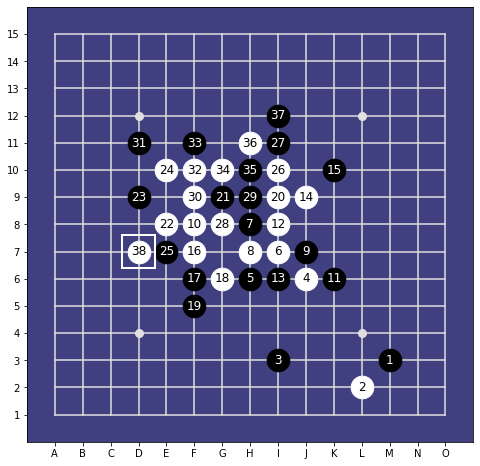

In [44]:
b = GomokuBoard(heuristics=Heuristics(kappa=3), stones=stones, disp_width=8, n=15)
b.display()

---
# Gomocup 2018 data for upload to GCP

In [26]:
res = read_psq("../games/0_0_1_2.psq")
res

{'filetype': 'Piskvorky',
 'dim_x': 20,
 'dim_y': 20,
 'h3': '11:11',
 'h4': '0',
 'player1': 'RENJUSOLVER.F.zip',
 'player2': 'YIXIN18.zip',
 'game': 'j20k20j19k19j18k18j17k17k16j16m16i15h14l15h13k15j15i14l14m17n18i13i12o16o17j14l16k13l12h15g16n15n16j11h12k12h11h10j13k11k14g10i10m11l11k9k10l10j8m9j12j9l9m12m15p18g12f12m10p15i16m14l13h17p17q14n17o12o13r15r17q17p13s12r13q15o15q16q18q13',
 't3': '-1',
 't4': '1',
 'tournament': 'Freestyle1',
 'blob': 'Piskvorky 20x20; 11:11; 0\n10;20;0\n11;20;0\n10;19;0\n11;19;0\n10;18;0\n11;18;0\n10;17;0\n11;17;0\n11;16;0\n10;16;0\n13;16;0\n9;15;39664\n8;14;17272\n12;15;12787\n8;13;19600\n11;15;24444\n10;15;19225\n9;14;27320\n12;14;19054\n13;17;33618\n14;18;18678\n9;13;6068\n9;12;18522\n15;16;13177\n15;17;18193\n10;14;23539\n12;16;36\n11;13;106326\n12;12;17615\n8;15;19303\n7;16;17647\n14;15;31476\n14;16;17194\n10;11;31290\n8;12;17147\n11;12;20241\n8;11;16615\n8;10;21\n10;13;16568\n11;11;35868\n11;14;37\n7;10;20\n9;10;16131\n13;11;10193\n12;11;16052\n11;

#### Concatenating psq files into a single CSV
Attention: This might take a while!!

Especially, 'Fastgame' takes about half an hour or so

In [ ]:
df = pd.DataFrame()
tournaments = ['Fastgame', 'Freestyle1', 'Freestyle2', 'Freestyle3', 'Freestyle4', 'Standard']

directory='/Users/wgiersche/Downloads/gomocup2018results/'+'Freestyle1'

files = [f for f in os.listdir(directory) if '.psq' in f]
for file in files:
    res = read_psq(directory + "/" + file)
    df = df.append(res, ignore_index=True)

In [ ]:
df.to_csv('Standard.csv')

In [ ]:
list(df.head()['game'])

#### Uploading into a single BigQuery Table

In [ ]:
%%bash
bq --location=US load --autodetect --source_format=CSV --replace gomoku.tournaments_tmp gs://gomoku-data/gomocup2018results/Freestyle1.csv
bq --location=US load --autodetect --source_format=CSV gomoku.tournaments_tmp gs://gomoku-data/gomocup2018results/Freestyle2.csv
bq --location=US load --autodetect --source_format=CSV gomoku.tournaments_tmp gs://gomoku-data/gomocup2018results/Freestyle3.csv
bq --location=US load --autodetect --source_format=CSV gomoku.tournaments_tmp gs://gomoku-data/gomocup2018results/Freestyle4.csv
bq --location=US load --autodetect --source_format=CSV gomoku.tournaments_tmp gs://gomoku-data/gomocup2018results/Standard.csv
bq --location=US load --autodetect --source_format=CSV gomoku.tournaments_tmp gs://gomoku-data/gomocup2018results/Fastgame.csv

In [10]:
%%bigquery
select tournament, count(*) from `going-tfx.gomoku.tournaments` group by tournament

,tournament,f0_
0,Freestyle4,3744
1,Freestyle3,2880
2,Freestyle2,2880
3,Fastgame,22704
4,Freestyle1,5760
5,Standard,1584


In [ ]:
%%writefile /tmp/transfer.sql
select tournament, "2018" as year, dim_x, dim_y, filetype, game, player1, player2, h3, h4, t3, t4, blob
from `going-tfx.gomoku.tournaments_tmp`

In [ ]:
_ = !cat /tmp/transfer.sql | bq --location=US query --replace --destination_table gomoku.tournaments --use_legacy_sql=false

---
# Preprocessing from BQ

In [11]:
%%bigquery
select * from `going-tfx.gomoku.tournaments` limit 10

,tournament,year,dim_x,dim_y,filetype,game,player1,player2,h3,h4,t3,t4,blob
0,Freestyle4,2018,20.0,20.0,Piskvorky,r5q3n2o5n6n5o4p4p5q6o6q7p6n7o7p8o9n8q4o8q8m6l5...,EGO.zip,RAPFI.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n18;5;0\n17;3;0\n14;...
1,Freestyle4,2018,20.0,20.0,Piskvorky,j20k20j19k19j18k18j17k17k16j16m16l15i15l14l13k...,EGO.zip,ALPHAGOMOKU.KOZARZEWSKI.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n10;20;0\n11;20;0\n1...
2,Freestyle3,2018,20.0,20.0,Piskvorky,h18h16m18m16g17g18i17f18i16e18i19d18c18f16i18i...,EGO.zip,STAHLFAUST.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n8;18;0\n8;16;0\n13;...
3,Freestyle2,2018,20.0,20.0,Piskvorky,h13h15d15c16k12d17j13e18b15f17g16e17g17c17b17e...,EGO.zip,GOFIVE.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n8;13;0\n8;15;0\n4;1...
4,Fastgame,2018,20.0,20.0,Piskvorky,j20k20i20l20h20m20n18m16n16m17m15l14o17n15o14o...,EGO.zip,TITO14.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n10;20;0\n11;20;0\n9...
5,Fastgame,2018,20.0,20.0,Piskvorky,r5q3n2o5n6n5o4p6p5n3q4p4q7p3o3o7n8l5o8m4k6m3m6...,EGO.zip,WINE18.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n18;5;0\n17;3;0\n14;...
6,Fastgame,2018,20.0,20.0,Piskvorky,b11e11d11f12d10d9e9f10f8g7b12c11b13b14c12f9f13...,EGO.zip,EULRING.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n2;11;0\n5;11;0\n4;1...
7,Fastgame,2018,20.0,20.0,Piskvorky,b20d20g20i20l20n20q20s20e19e16f16f15g14e14e15d...,EGO.zip,EULRING.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n2;20;0\n4;20;0\n7;2...
8,Fastgame,2018,20.0,20.0,Piskvorky,b11e11d11f12d10d9e9f10f8g7b12c11b13b14c12f9f13...,EGO.zip,FASTGOMOKU14.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n2;11;0\n5;11;0\n4;1...
9,Fastgame,2018,20.0,20.0,Piskvorky,j20k20i20l20h20m20n18l16m16l17l18k17n16j17i17n...,EGO.zip,RAPFI.zip,11:11,0,-1,1,Piskvorky 20x20; 11:11; 0\n10;20;0\n11;20;0\n9...


---
### Create Training data from a string rep

In [48]:
size=20

In [16]:
import apache_beam as beam
from wgomoku import data_from_game

/home/wgiersche/env3/lib/python3.5/site-packages/apache_beam/__init__.py:84: UserWarning: Running the Apache Beam SDK on Python 3 is not yet fully supported. You may encounter buggy behavior or missing features.
  'Running the Apache Beam SDK on Python 3 is not yet fully supported. '


In [50]:
heuristics = Heuristics(kappa=3.0)

In [51]:
def get_train_data_function(heuristics, N):
   
    def _create_train_data(recording):
        strrep =  recording['game']
        print(strrep)
        stones = gt.string_to_stones(strrep)
        board = GomokuBoard(heuristics, N, disp_width=8, stones=stones)
        policy = HeuristicGomokuPolicy(board, 2)
        return data_from_game(board, policy, heuristics)

    return _create_train_data

In [52]:
data_function = get_train_data_function(heuristics, size)

In [53]:
data = data_function({'game': 'e10g8g5f5f6e7f7f8e8g9h10d9'})

e10g8g5f5f6e7f7f8e8g9h10d9


In [54]:
type(data), data[0].shape, data[1].shape, data[2].shape

(tuple, (32, 22, 22, 2), (32, 22, 22, 1), (32, 22, 22, 1))

In [55]:
state2 = np.rollaxis(data[0][2], 2, 0)
list(state2)

[array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 

In [56]:
data[0].shape, data[1].shape, data[2].shape

((32, 22, 22, 2), (32, 22, 22, 1), (32, 22, 22, 1))

In [57]:
s_and_q = list(zip(data[0], data[1], data[2]))
s_and_q[0][0].shape, s_and_q[0][1].shape, s_and_q[0][2].shape

((22, 22, 2), (22, 22, 1), (22, 22, 1))

In [58]:
N_p = size+2

feature_spec = {
    'state': tf.FixedLenFeature([N_p * N_p * 2], tf.float32),
    'qvalue': tf.FixedLenFeature([N_p * N_p], tf.float32),
    'advantage': tf.FixedLenFeature([N_p * N_p], tf.float32)
}

In [59]:
def _floats_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=value))

In [60]:
tfr_filename = "deleteme.tfr"
with tf.python_io.TFRecordWriter(tfr_filename) as writer:
    for vec in s_and_q:
        # Create an example protocol buffer
        example = tf.train.Example(features=tf.train.Features(feature={
            'state': _floats_feature(vec[0].flatten()),
            'qvalue' : _floats_feature(vec[1].flatten()),
            'advantage' : _floats_feature(vec[2].flatten())
            }))
        writer.write(example.SerializeToString())

### Now reading it back from file

In [61]:
def _parse_function(example):
    return tf.parse_single_example(example, feature_spec)

In [62]:
dataset = tf.data.TFRecordDataset("deleteme.tfr")

In [63]:
decoded = dataset.map(_parse_function).make_one_shot_iterator().get_next()

In [64]:
decoded

{'advantage': <tf.Tensor 'IteratorGetNext_2:0' shape=(484,) dtype=float32>,
 'qvalue': <tf.Tensor 'IteratorGetNext_2:1' shape=(484,) dtype=float32>,
 'state': <tf.Tensor 'IteratorGetNext_2:2' shape=(968,) dtype=float32>}

In [65]:
with tf.Session() as sess:
    sess.run(decoded)
    sess.run(decoded)
    res2 = sess.run(decoded)

In [66]:
res2['state'].shape, res2['qvalue'].shape, res2['advantage'].shape

((968,), (484,), (484,))

In [67]:
state2_p = np.rollaxis(data[0][2], 2, 0)
np.equal(state2, state2_p).all()

True

In [70]:
res2['advantage']

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 

# Production-grade: Using a Beam pipeline

In [71]:
def flatten_and_zip (games): 
    """
        Prepare a game for tf_record encoding - make sure to flatmap the return value!
    """
    return [{
        'state': s.flatten(), 
        'qvalue': q.flatten(),
        'advantage': a.flatten()}  for s, q, a in zip(games[0], games[1], games[2])]

In [72]:
create_training_data = get_train_data_function(heuristics, size)

In [73]:
import datetime
import tempfile
import tensorflow_transform.beam.impl as beam_impl
import tensorflow_transform as tft

PROJECT='going-tfx'
BUCKET='going-tfx'
LOCAL_TMPDIR="/tmp"
OUTPUT_DIR="./out"
runner='DirectRunner'
job_name = 'tournament_data' + '-' + datetime.datetime.now().strftime('%y%m%d-%H%M%S')    

options = {
    'staging_location': os.path.join(OUTPUT_DIR, 'tmp', 'staging'),
    'temp_location': os.path.join(OUTPUT_DIR, 'tmp'),
    'job_name': job_name,
    'project': PROJECT,
    'max_num_workers': 24,
    'teardown_policy': 'TEARDOWN_ALWAYS',
    'no_save_main_session': True,
    'requirements_file': 'requirements.txt'
}
opts = beam.pipeline.PipelineOptions(flags=[], **options)

query = """
    select distinct(game) from `going-tfx.gomoku.tournaments` where dim_x=20 
    and  MOD(FARM_FINGERPRINT(blob ),20) = 0 
    limit 50"""

In [74]:
import tensorflow_transform.tf_metadata as metadata
schema = metadata.dataset_schema.from_feature_spec(feature_spec)

#### Verify TFR encoding works
The result is just bytes

In [75]:
create_training_data = get_train_data_function(heuristics, 20)

In [76]:
training_data = create_training_data({'game': 'j20k20j19k19j18k18j17k17k16j16m16l15i15l14'})

j20k20j19k19j18k18j17k17k16j16m16l15i15l14


In [77]:
training_data[0].shape

(32, 22, 22, 2)

In [78]:
schema

Schema(feature {
  name: "advantage"
  type: FLOAT
  presence {
    min_fraction: 1.0
  }
  shape {
    dim {
      size: 484
    }
  }
}
feature {
  name: "qvalue"
  type: FLOAT
  presence {
    min_fraction: 1.0
  }
  shape {
    dim {
      size: 484
    }
  }
}
feature {
  name: "state"
  type: FLOAT
  presence {
    min_fraction: 1.0
  }
  shape {
    dim {
      size: 968
    }
  }
}
)

In [79]:
tfr_encoder = tft.coders.ExampleProtoCoder(schema)
a_record = flatten_and_zip(training_data)[0]
encoded = tfr_encoder.encode(a_record)
type(encoded)

bytes

## The pipeline from BQ to TFR
This takes a while - be patient

In [80]:
out_name="games"
OUTPUT_DIR="gs://gomoku-data/tfrecords"
out_prefix = os.path.join(OUTPUT_DIR, out_name)
phase='train'
with beam.Pipeline(runner, options=opts) as p:
    with beam_impl.Context(temp_dir=tempfile.mkdtemp()):


        #   Read from Big Query
        #
        from_bq = p | "ReadFromBigQuery"  >> beam.io.Read(beam.io.BigQuerySource(
            query=query, use_standard_sql=True)) 

        # Encode back to file(s)
        #
        tfr_encoder = tft.coders.ExampleProtoCoder(schema)
        res = (from_bq
               | beam.Map(create_training_data)
               | beam.FlatMap(flatten_and_zip)
               | ('EncodeTFRecord_' + phase) >> beam.Map(tfr_encoder.encode)
               | ('WriteTFRecord_' + phase) >> beam.io.WriteToTFRecord(out_prefix+'_tfr'))



print(out_prefix + '_tfr')

h13h15d15c16k12g15k13g14j12i16f13i15j15g13g12i14i12h12h11e14m12l12j9i10i17g16g17f17e18j13
b20d20g20i20l20n20q20s20e19e17f19g16f16f15e15g14g17d14e14h13i12e13d19g19b19c19f18g13f17f20h18i19i15h16f13g15g12f14d12i17
r5q3n2o5n6n5o4m5p5k5l5q6q4p4o6n7r3s2r2r6o2s6p2q2m2l2n3l1m4k6p1
h13h15d15c16k12e18i12d17f19f17g16e17g17c17b17c15c18d16f18e15e16b18a19f14
b11e11d11f12d10d9e9f10f8g7b12c11b13b14c12f9f13d12c13d13e12c10d15g9h8g8g6g11g10h9i9k11c14a1e16a2a12
r5q3n2m2l2o5p4p6o6n4q7m5n5o3p2m4m3k4l4k5k7j5l3l5i5k6n3j3m6j7i8j4j6h4m9l8l7i4g4k2k3h5g6l1
e2f5f4e6g4e4g6g5h5f3d5i4e7f7d6d8e5c7c5f8f9e9b5a5b6b4g3h2d4d3e3f2a7
j20k20i20l20h20m20n18n19o18p18p17o19q17o17n16l17k16o16l19h19o15n14k17k14l14l18m16o20n20j16m15m14p15q15l15n15l13l12p14q13p13p16p19n17q16r17k13j12r14s14n13m13m12o14k11j15j14i18n11h17g16i17p11p12f20g20i16j18k18h16k19k15o10p9h18g15f14h15i15n9f16o9m9q11g17i19e15d14r9r10o13q10q14o12f15q12q9r12n12s12
d20a20c19b19b18c18a17d17e16d15e15d16d14e13f14e17f13f18g19e18g18f17g17d19d18g16c20h15
s2r5q6m8m5o6p5o4m6

gs://gomoku-data/tfrecords/games_tfr


### Reading from the record

In [81]:
dataset = tf.data.TFRecordDataset("gs://gomoku-data/tfrecords/games_tfr-00000-of-00001")

In [82]:
decoded = (dataset.map(lambda example: tf.parse_single_example(example, feature_spec))
           .make_one_shot_iterator().get_next())

In [83]:
with tf.Session() as sess:
    sess.run(decoded)
    sess.run(decoded)
    res2 = sess.run(decoded)

In [84]:
res2['state'].shape, res2['qvalue'].shape, res2['advantage'].shape

((968,), (484,), (484,))

In [85]:
res2['state'].shape

(968,)

In [86]:
state2_p = np.rollaxis(data[0][2], 2, 0)
np.equal(state2, state2_p).all()

True

### High-performance dataset

In [87]:
dataset = tf.data.experimental.make_batched_features_dataset(
    file_pattern="gs://gomoku-data/tfrecords/games_tfr-00000-of-00001",
    batch_size=10,
    features=feature_spec,
    shuffle_buffer_size=10,
    prefetch_buffer_size=5,
    reader_num_threads=12,
    parser_num_threads=12,
    label_key="advantage")


In [88]:
batch = dataset.make_one_shot_iterator().get_next()

In [89]:
with tf.Session() as sess:
    s,q = sess.run(batch)

### Reconstruct the moves
...in arbitrary order, that is...

In [90]:
idx=2

In [91]:
field = np.rollaxis(s['state'][idx].reshape(22,22,2), 2, 0).astype(np.int)
unwrapped = (field[0]+field[1]*2)[1:-1].T[1:-1].T
unwrapped

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [103]:
r,c = np.where(unwrapped == 1)
moves_b = list(zip(r,c))
r,c = np.where(unwrapped == 2)
moves_w = list(zip(r,c))

In [104]:
moves_b, moves_w = (moves_b, moves_w) if len(moves_b) == len(moves_w) else (moves_w, moves_b)
moves_b = [gt.m2b(move, 20) for move in moves_b]
moves_w = [gt.m2b(move, 20) for move in moves_w]

In [105]:
if len(moves_b) > len(moves_w):
    last_move = moves_b[-1]

In [106]:
stones=[]
for two_moves in zip(moves_b, moves_w):
    for i in [0, 1]:
        stones.append((two_moves[i][0], two_moves[i][1]))
if len(moves_b) > len(moves_w):
    stones.append((moves_b[-1][0], moves_b[-1][1]))

In [128]:
print(stones)

[(11, 12), (12, 11), (13, 10), (9, 9), (8, 9), (13, 9), (10, 9), (14, 8), (11, 9), (12, 7), (12, 9), (14, 7), (14, 9), (16, 7), (10, 8), (12, 6), (13, 8), (13, 6), (15, 8), (14, 6), (11, 6), (12, 5), (17, 6), (14, 5), (12, 4), (18, 5), (14, 4), (15, 4)]


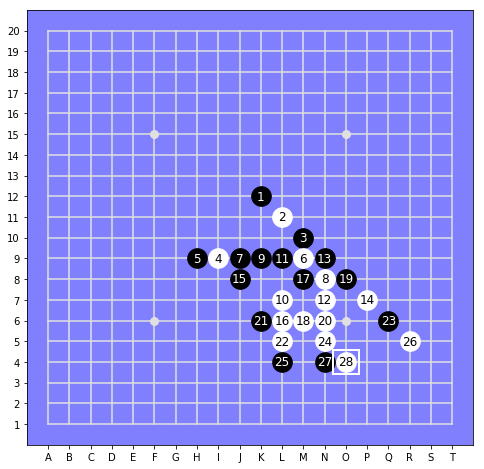

In [109]:
board = GomokuBoard(heuristics, 20, disp_width=8, stones=stones)
board.display()

# Verify advantage values from file

In [110]:
from QFunction import heuristic_QF

In [111]:
policy = HeuristicGomokuPolicy(board, style=2)

In [112]:
qvalue = heuristic_QF(board, policy)
qvalue = qvalue[0].astype(np.float32)

In [113]:
from_file = q[idx].reshape(N_p, N_p)[1:-1].T[1:-1].T

In [119]:
((qvalue+200.)/100. == from_file).all()

True

In [127]:
[(gt.m2b((r, c),20), from_file[r][c]) for r in range(20) for c in range(20) if from_file[r][c] > 0]

[(array([11,  8]), 2.149414),
 (array([13,  7]), 2.1569126),
 (array([15,  7]), 2.201244),
 (array([16,  3]), 2.2100344)]